In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.axes import Axes as ax

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# Display data for easy reference 

fifa = pd.read_csv('/work/players_fifa23.csv')
fifa.head() 

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
# Replace missing values (NaN) with column mean; drop rows where value/wage info are unavailable  

fifa['Age'].fillna(fifa['Age'].mean(), inplace = True)
fifa['Height'].fillna(fifa['Height'].mean(), inplace = True)
fifa['Weight'].fillna(fifa['Weight'].mean(), inplace = True)
fifa['ValueEUR'].fillna(fifa['ValueEUR'].mean(), inplace = True)
fifa['WageEUR'].fillna(fifa['WageEUR'].mean(), inplace = True)
fifa['ReleaseClause'].fillna(fifa['ReleaseClause'].mean(), inplace = True)

fifa = fifa.drop(fifa[fifa['ValueEUR']==0].index,axis=0)
fifa = fifa.drop(fifa[fifa['WageEUR']==0].index,axis=0)

# Clean and organize 'age' column into <30 and > 30

def under_30(df):
    return (df['Age']<30)
temp = pd.get_dummies(under_30(fifa))
fifa['under_30'],fifa['above_30'] = temp.iloc[:,1],temp.iloc[:,0]

fifa['Age under 30'] = fifa['under_30']*fifa['Age']
fifa['Age above 30'] = fifa['above_30']*fifa['Age']

# Clean dataset, create new column 'ContractLen' to replace two redundant columns

def contract_len(df):
    return df['ContractUntil']-df['ClubJoined']
fifa['ContractLen'] = contract_len(fifa)

# Replace player attributes with log values 

fifa['log ShootingTotal'] = np.log(fifa['ShootingTotal'])
fifa['log PassingTotal'] = np.log(fifa['PassingTotal'])
fifa['log DribblingTotal'] = np.log(fifa['DribblingTotal'])
fifa['log DefendingTotal'] = np.log(fifa['DefendingTotal'])
fifa['log HeadingAccuracy'] = np.log(fifa['HeadingAccuracy'])
fifa['log ValueEUR'] = np.log(fifa['ValueEUR'])
fifa['sq Overall'] = fifa['Overall']**3


<AxesSubplot: xlabel='ReleaseClause', ylabel='ValueEUR'>

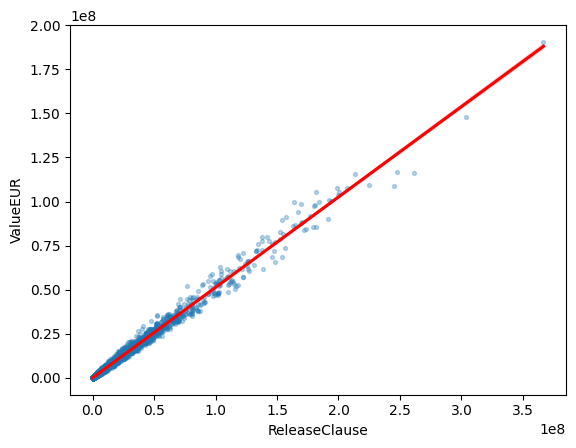

In [8]:
sns.regplot(x='ReleaseClause',y='ValueEUR',data=fifa[fifa['ReleaseClause']!=0], line_kws={"color": "red"},scatter_kws={'s':8,'alpha':0.3})

In [ ]:
def normalize(df,feature):
    col = df[feature]
    return (col-np.mean(col))/np.std(col)

In [ ]:
# Finally, clean the dataset, select necessary columns, and get ready to put them into the model

df = pd.get_dummies(fifa[['sq Overall', 'log ValueEUR', 'WageEUR', 'IntReputation',
'Age under 30','Age above 30',
'ContractLen', 'ClubPosition','Acceleration','Strength', 'Positioning',
'log ShootingTotal','log PassingTotal', 'log DribblingTotal',
'DefendingTotal','HeadingAccuracy', 'LongShots',
'Potential', 'ReleaseClause']])

df

,sq Overall,log ValueEUR,WageEUR,IntReputation,ContractLen,Acceleration,Strength,Positioning,log ShootingTotal,log PassingTotal,...,ClubPosition_LW,ClubPosition_LWB,ClubPosition_RB,ClubPosition_RES,ClubPosition_RF,ClubPosition_RM,ClubPosition_RW,ClubPosition_RWB,ClubPosition_ST,ClubPosition_SUB
0,753571,17.804495,195000,5,2.0,87,68,93,4.488636,4.499810,...,0,0,0,0,0,0,1,0,0,0
1,753571,17.974394,450000,4,14.0,79,82,92,4.477337,4.418841,...,0,0,0,0,0,0,0,0,0,0
2,753571,18.246327,420000,5,3.0,76,87,94,4.510860,4.369448,...,0,0,0,0,0,0,0,0,1,0
3,753571,18.493001,350000,4,10.0,76,74,88,4.477337,4.532599,...,0,0,0,0,0,0,0,0,0,0
4,753571,19.065163,230000,4,6.0,97,76,92,4.488636,4.382027,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,103823,11.608236,500,1,4.0,69,31,50,3.871201,3.761200,...,0,0,0,1,0,0,0,0,0,0
18535,103823,11.407565,500,1,2.0,52,35,35,3.610918,3.713572,...,0,0,0,0,0,0,0,0,0,1
18536,103823,11.775290,500,1,1.0,70,31,42,3.688879,3.891820,...,0,0,0,0,0,0,0,0,0,1
18537,103823,11.512925,500,1,2.0,53,34,23,3.178054,3.218876,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
columns = fifa.columns
corr_list = []
column_needed = []
y = fifa['WageEUR']
for col in columns:
    if type(fifa[col][0]) == np.int64:
        corr = np.corrcoef(fifa[col], y)
        corr_list.append(np.round(corr[0][1], 3))
        column_needed.append(col)
data = {"Column": column_needed, "Correlation Score": corr_list}
correlation_score = pd.DataFrame(data)
correlation_score[correlation_score['Correlation Score'] > 0.5]

,Column,Correlation Score
4,Overall,0.602
9,ValueEUR,0.823
10,WageEUR,1.000
11,ReleaseClause,0.793
13,IntReputation,0.633
35,Reactions,0.542
75,sq Overall,0.678


In [ ]:
#df = df.dropna()
#df = fifa[['Overall', 'log ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'WageEUR']]
training, testing = train_test_split(df, test_size=0.2, random_state=41)
x_train = training.drop(labels='WageEUR',axis=1)
y_train = training[['WageEUR']]
x_test = testing.drop(labels='WageEUR',axis=1)
y_test = testing[['WageEUR']]

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
#model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7289981351540809, 0.7230734584948021)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
rf = DecisionTreeRegressor(random_state = 42, criterion='friedman_mse', max_depth=6)
rf.fit(x_train, y_train)
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.8364270471711241, 0.7253294841235558)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf = RandomForestRegressor(n_estimators = 200, random_state = 42, max_depth=6)
rf.fit(x_train, y_train)
rf.score(x_train, y_train), rf.score(x_test, y_test)

/tmp/ipykernel_458/4034169144.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


(0.8532953546013428, 0.7588391202211491)

In [ ]:
model_4 = MLPRegressor(activation='identity',
 hidden_layer_sizes=(30,20,10,5), max_iter=100, learning_rate = 'adaptive',random_state=42)
model_4.fit(x_train,y_train)
model_4.score(x_train,y_train), model_4.score(x_test,y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.31969694841335494, 0.3339548863578663)

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

model_1 = LinearRegression()
model_3 = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=6)
model_4 = MLPRegressor(activation='relu',solver='adam',
 hidden_layer_sizes=(20,10), max_iter=50, random_state=42)
model_5 = DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=42)
model_6 = MLPRegressor(activation='relu',hidden_layer_sizes=10, max_iter=50, random_state=42)
#model_6 = KNeighborsRegressor(n_neighbors=5)
model_9 = GradientBoostingRegressor(learning_rate=0.1, random_state=42)

estimators = [('lrr', RidgeCV()), ('lasso', LassoCV(random_state=42)), 
                ('lr', model_1), ('rf', model_3), ('mlp', model_4), ('dt', model_5),
                ('gb', model_9), ('mlp1',model_6)]
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10))
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featu

0.7347244114603785

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc80a5ab-5a4e-4539-9976-15d1bdddd134' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>